In [1]:
import pandas
import numpy
import mba263
import matplotlib.pyplot as plt

In [2]:
data=pandas.read_csv('data/neural_example.csv')
data

,numpurch,age,totdol,female,adB,res,validation
0,89.0,27,321.59,1,0,0,0
1,72.0,25,107.03,0,1,0,1
2,6.0,31,410.12,0,1,0,0
3,48.0,28,102.30,1,1,0,1
4,52.0,26,203.34,1,0,0,0
...,...,...,...,...,...,...,...
9995,51.0,26,284.06,0,0,0,1
9996,55.0,30,304.39,0,1,0,0
9997,50.0,30,168.35,0,0,0,1
9998,6.0,37,211.60,0,1,0,0


First we run logistic regression of responding to an offer on all the variables, without interactions

In [6]:
result = mba263.logit(data['res'],data[ ['numpurch','age','totdol','female','adB'] ])

Optimization terminated successfully.
         Current function value: 0.161880
         Iterations 9


In [7]:
data['p1']=result.predict()
mba263.odds_ratios(result)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
numpurch,1.074139,0.003315,22.362945,0.000,1.067707,1.080571
age,1.021100,0.010532,2.003470,0.045,1.000668,1.041532
totdol,1.000999,0.000381,2.621805,0.009,1.000260,1.001737
female,0.910223,0.084880,1.057693,0.290,0.745557,1.074890
adB,1.184760,0.109204,1.691878,0.091,0.972904,1.396616


female = odds ratio less than 1, less likely to respond to these ads
adB = > 1, people more likely to respond to banner ad

This function returns gain measure table with 'n' bins

In [8]:
gains1=mba263.gain(data['res'],data['p1'],bins=30)

Let's plot it

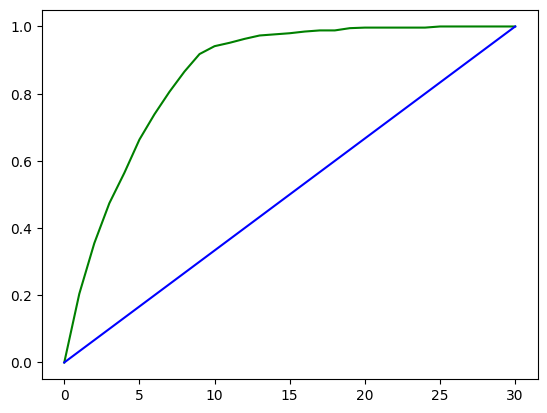

In [9]:
plt.plot(gains1,'g')
plt.plot([0,30],[0,1],'b')

Let's estimate a neural network. Syntax is a bit different - but still similar format to OLS and Logit<br><br>
<code>mba263.neural_network(response,predictors)</code>

In [10]:
result_nn = mba263.neural_network(data['res'],data[ ['numpurch','age','totdol','female','adB'] ])

In [11]:
data['p_nn'] = result_nn.predict(data[ ['numpurch','age','totdol','female','adB'] ])

Compute gains measure for neural network and overlay on top of logit and baseline models

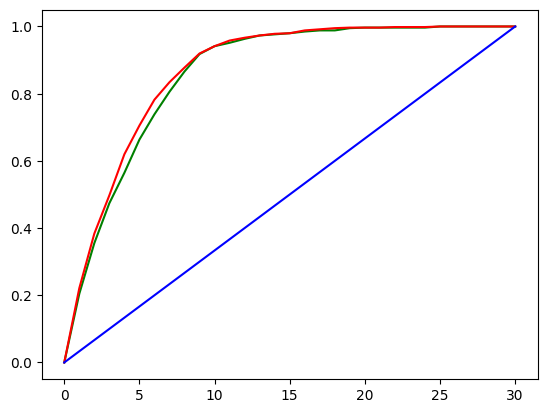

In [12]:
gains_nn=mba263.gain(data['res'],data['p_nn'],30)
plt.plot(gains1,'g')
plt.plot(gains_nn,'r')
plt.plot([0,30],[0,1],'b')

Neural network performs better. We likely miss an interaction term. What interactions are possible?

In [13]:
result_nn_scaled2 = mba263.neural_network(data['res'],data[ ['numpurch','age','totdol','female','adB'] ])

In [14]:
data.head(10)

,numpurch,age,totdol,female,adB,res,validation,p1,p_nn
0,89.0,27,321.59,1,0,0,0,0.123800,0.197138
1,72.0,25,107.03,0,1,0,1,0.040503,0.059404
2,6.0,31,410.12,0,1,0,0,0.000577,0.000310
3,48.0,28,102.30,1,1,0,1,0.007263,0.002065
4,52.0,26,203.34,1,0,0,0,0.008645,0.006042
5,16.0,32,378.38,0,1,0,1,0.001166,0.000785
6,43.0,41,213.00,1,1,0,0,0.007441,0.004181
7,15.0,26,390.16,1,1,0,1,0.000882,0.000136
8,55.0,27,367.41,0,0,0,0,0.014080,0.012486
9,15.0,30,384.77,0,0,0,1,0.000885,0.000743


In [15]:
data['female_adB']=data['female']*data['adB']

In [16]:
result2 = mba263.logit(data['res'],data[ ['numpurch','age','totdol','female','adB','female_adB']])
data['p2'] = result2.predict()
gains2=mba263.gain(data['res'],data['p2'],30)

Optimization terminated successfully.
         Current function value: 0.158615
         Iterations 9


In [17]:
mba263.odds_ratios(result)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
numpurch,1.074139,0.003315,22.362945,0.000,1.067707,1.080571
age,1.021100,0.010532,2.003470,0.045,1.000668,1.041532
totdol,1.000999,0.000381,2.621805,0.009,1.000260,1.001737
female,0.910223,0.084880,1.057693,0.290,0.745557,1.074890
adB,1.184760,0.109204,1.691878,0.091,0.972904,1.396616


since female_adb very small, coeff very small

In [19]:
mba263.odds_ratios(result2)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
numpurch,1.075149,0.003363,22.346121,0.000,1.068625,1.081673
age,1.023308,0.010654,2.187784,0.029,1.002640,1.043976
totdol,1.000955,0.000384,2.487152,0.013,1.000210,1.001700
female,1.991198,0.269586,3.676747,0.000,1.468202,2.514194
adB,2.275448,0.286844,4.446485,0.000,1.718970,2.831925
female_adB,0.216153,0.041729,18.784040,0.000,0.135198,0.297108


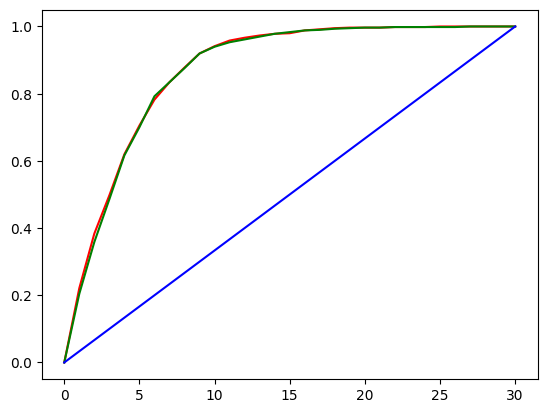

In [21]:
gains_nn=mba263.gain(data['res'],data['p_nn'],30)
plt.plot(gains_nn,'r')
plt.plot(gains2,'g')
plt.plot([0,30],[0,1],'b')

Let's compare against a random forest- this one has a few more arguments:<br>
<code> mba263.random_forest(response, predictors, trees=NUMTREES,leaf_nodes=NUMNODES)</code> <br>
Trees argument tells us how many times to bootstrap the model (more= less sensitive to outliers)<br>
Leaf nodes argument tells us how detailed to make the trees (more = more overfitting)

In [22]:
result_rf = mba263.random_forest(data['res'],data[ ['numpurch','age','totdol','female','adB'] ],trees=500,leaf_nodes=15)

In [24]:
data['p_rf']=result_rf.predict(data[ ['numpurch','age','totdol','female','adB'] ])

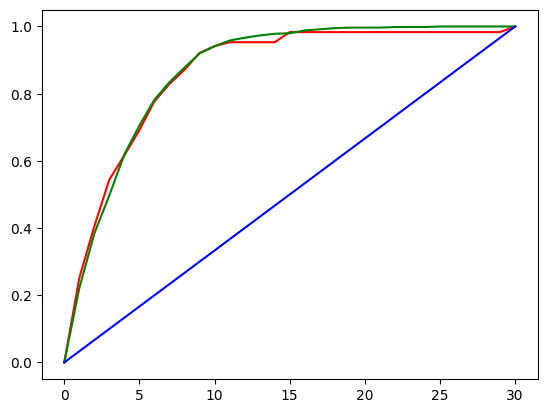

In [25]:
gains_rf=mba263.gain(data['res'],data['p_rf'],30)
plt.plot(gains_rf,'r')
plt.plot(gains_nn,'g')
plt.plot([0,30],[0,1],'b')

What if we let the trees become more detailed?

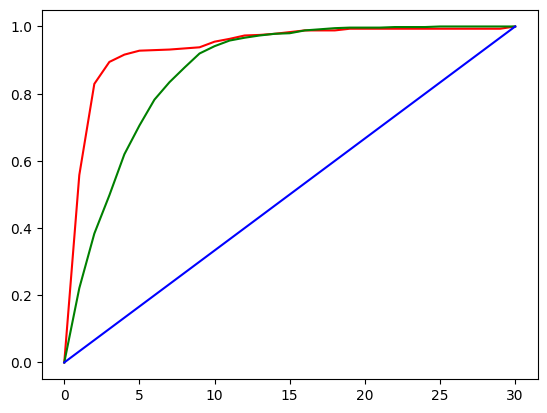

In [26]:
result_rf = mba263.random_forest(data['res'],data[ ['numpurch','age','totdol','female','adB'] ],trees=500,leaf_nodes=200)
data['p_rf']=result_rf.predict(data[ ['numpurch','age','totdol','female','adB'] ])
gains_rf=mba263.gain(data['res'],data['p_rf'],30)
plt.plot(gains_rf,'r')
plt.plot(gains_nn,'g')
plt.plot([0,30],[0,1],'b')

Looks pretty incredible, right? How can we make sure this isn't overfitting?


We'll fit the model just on the calibration/train part of the data

In [27]:
data_calibration=data[data['validation']==0]
data_validation=data[data['validation']==1]

We will test the model on the validation/test sample.

In [28]:
result_rf = mba263.random_forest(data_calibration['res'],\
                                 data_calibration[ ['numpurch','age','totdol','female','adB'] ],\
                                 trees=500,leaf_nodes=200)
data_validation['p_rf']=result_rf.predict(data_validation[ ['numpurch','age','totdol','female','adB'] ])

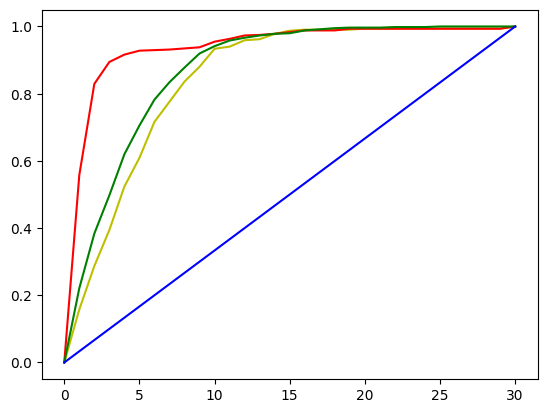

In [29]:
gains_rf_cross=mba263.gain(data_validation['res'],data_validation['p_rf'],30)
plt.plot(gains_rf_cross,'y')
plt.plot(gains_rf,'r')
plt.plot(gains_nn,'g')
plt.plot([0,30],[0,1],'b')

We can do the same with NN:

In [30]:
result_nn_train=mba263.neural_network(data_calibration['res'],\
                                      data_calibration[ ['numpurch','age','totdol','female','adB'] ],hidden_layer_sizes=(5,5))
data_calibration['p_nn']=result_nn_train.predict(data_calibration[['numpurch','age','totdol','female','adB']])
data_validation['p_nn']=result_nn_train.predict(data_validation[['numpurch','age','totdol','female','adB']])

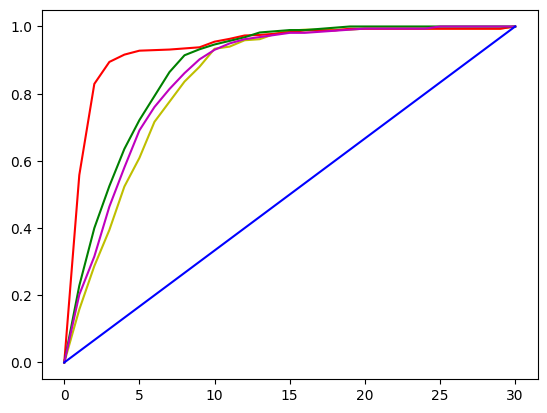

In [31]:
gains_nn_train=mba263.gain(data_calibration['res'],data_calibration['p_nn'],30)
gains_nn_cross=mba263.gain(data_validation['res'],data_validation['p_nn'],30)
plt.plot(gains_rf_cross,'y')
plt.plot(gains_rf,'r')
plt.plot(gains_nn_train,'g')
plt.plot(gains_nn_cross,'m')
plt.plot([0,30],[0,1],'b')